# Basic Visualisation procedure

For visualisation we will take our pretrained model ,and use it in inference mode, we preprocess every sentence to make it 
model compatible, then during inferencing , we will cache the output at the "add" layer ,since  max function used during
Globalmaxpooling is not invertible ,we cannot  find the exact argument responsible for result of max operation .That is why we cache
it, As it becomes clear from the image below of our network

In [5]:
import models.multichannel as ml

In [53]:
from keras.preprocessing.sequence import pad_sequences

In [6]:
import numpy as np
import pickle


In [8]:
dic=pickle.load(open("weights/polarity_model/word2index.p","rb"))
matrix=np.load("weights/polarity_model/embedding_matrix.npy")

In [11]:
model=ml.multichannel(nb_classes=1,matrix=matrix,input_len=250,drop=False,vocab_size=15000)
model.load_weights("weights/polarity.h5")

In [18]:
def preprocess(text):
    #preprocess any query to make it model compatible
    temp=[]
    for word in text.strip().split():
        print(word)
        if word in word2index: 
            if word2index[word] < vocab_size:
                temp.append(word2index[word])
            else:
                temp.append(vocab_size+1)
        
    return temp

In [391]:
#model parameters ,fixed for a given dataset
max_len=250
word2index=dic
vocab_size=15000

In [22]:
check=model.layers[-3].output

Rather than going through all the weights(w) of the last layer, we can take the max of the weights in first 100 weights,this 
makes it a little bit simpler , because first 100 features correspond to convulational layers of kernel size (2), and make a little
bit easier to map to the words of given sentence, it is not exactly accurate to visualize the contribution of each word in 
making decision based on a single weight, but it can give some intuition 

In [393]:
sess=K.get_session()

In [387]:
w=model.layers[-1].get_weights()[0]
arg=np.argmax(w[:100])
arg,w[arg]


We can use almost max positive weight for visualisation, since this will have quite high effect on driving our output
towards  1 , we can use this to get to know relative values of words in a sentence

In [411]:
test="i hope you live a better life "

In [414]:
sequence=preprocess(test)
size=len(sequence)
inp=pad_sequences([sequence],maxlen=max_len)
print(inp.shape)
prediction,activations=sess.run([model.output,check],feed_dict={model.input:inp})
print(prediction)
activations=activations[0,:,arg]
activations.shape

i
hope
you
live
a
better
life
(1, 250)
[[0.8556169]]


(250,)

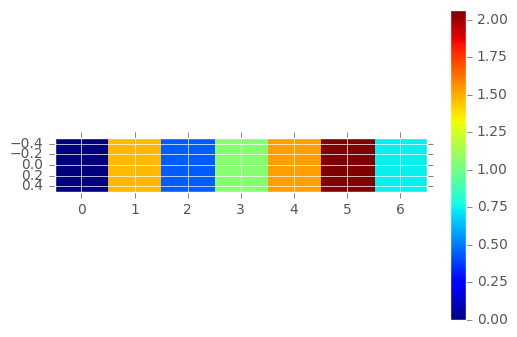

In [415]:
plt.imshow(activations[-size:].reshape(1,-1),interpolation="nearest")
plt.colorbar()


We see above a kind of reative importance of words in a given sentence for making a decision, in above example, word "better"
have high weightage